# 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [32]:
df = pd.read_csv('data.csv')
print(df.shape)
df = df.head(5000)
print(df.shape)

(5842, 2)
(5000, 2)


In [33]:
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


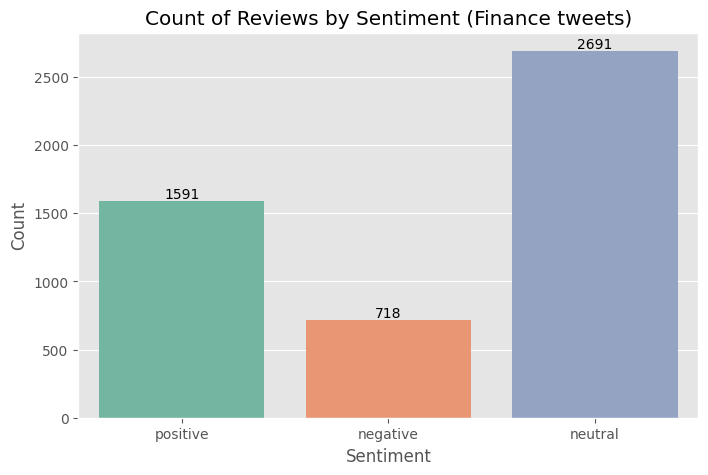

In [34]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Count of Reviews by Sentiment (Finance tweets)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [36]:
example = df['Sentence'][30]
print(example)

Stockmann and Swedish sector company AB Lindex entered into an agreement on September 30 , 2007 , whereby Stockmann , or a wholly-owned subsidiary of it , will make a public tender offer for all of Lindex 's issued shares .


In [39]:
# Add the code you provided
df = df.replace(r'^\s*$', float('NaN'), regex=True)
df = df.dropna()
X = df['Sentence']
y = df['Sentiment']
print(X.isna().sum())
print(y.isna().sum())

0
0


In [40]:
#data processing
import re, string
import emoji
import nltk

from tqdm.notebook import tqdm
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split#data processing

In [41]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

In [43]:
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

In [44]:
def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [46]:
texts_new = []
for t in df.Sentence:
    if pd.notna(t):  # Check if 't' is not NaN
        #cleaned_text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(str(t)))))
        cleaned_text = remove_mult_spaces(clean(clean_hashtags(str(t))))
        texts_new.append(cleaned_text)
    else:
        texts_new.append("")  # Replace NaN with an empty string


In [48]:
df['text_cleaned'] = texts_new

In [49]:
text_len = []
for text in df.text_cleaned:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [50]:
df['text_len'] = text_len

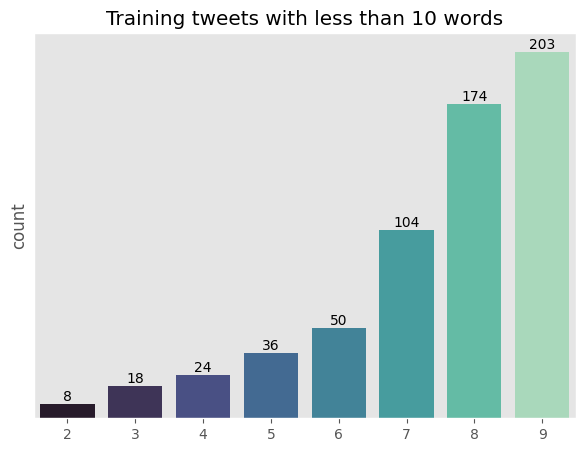

In [51]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [52]:
# Function to count words in a text
def count_words(text):
    words = text.split()
    return len(words)

# Apply the function to the 'Sentence' column and store the word counts in a new column
df['Word_Count'] = df['text_cleaned'].apply(count_words)


    

In [54]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (5000, 5)


In [55]:
df = df[df['text_len'] > 4]

In [56]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (4950, 5)


  0%|          | 0/4950 [00:00<?, ?it/s]

Positive F1 Score: 0.7041884816753926
Neutral F1 Score: 0.7378888322284549
Negative F1 Score: 0.9315778113533348
Positive Sentiments Count: 2260
Neutral Sentiments Count: 2056
Negative Sentiments Count: 634


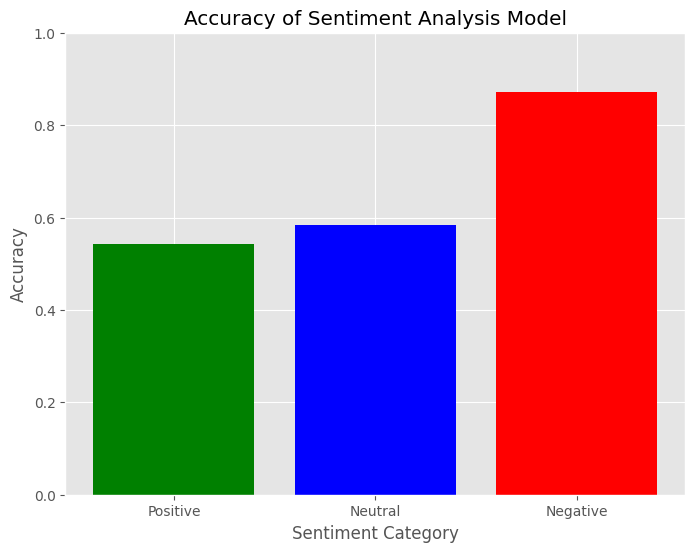

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import f1_score, accuracy_score
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate sentiment scores and labels
def calculate_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    
    if compound_score >= 0.1:
        return 1  # Positive sentiment
    elif compound_score <= -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Assuming you have already loaded the 'df' DataFrame and cleaned 'text' as 'texts_new'

# Calculate sentiment scores and labels for 'texts_new'
#sentiment_labels = [calculate_sentiment(text) for text in tqdm(texts_new)]
sentiment_labels = [calculate_sentiment(text) for text in tqdm(df['Sentence'])]
# Add sentiment labels to the DataFrame 'df'
df['sentiment'] = sentiment_labels

# Calculate F1 scores
positive_f1 = f1_score(df['sentiment'] == 'Positive', df['sentiment'] == 1, average='weighted')
neutral_f1 = f1_score(df['sentiment'] == 'Neutral', df['sentiment'] == 0, average='weighted')
negative_f1 = f1_score(df['sentiment'] == 'Negative', df['sentiment'] == -1, average='weighted')

print("Positive F1 Score:", positive_f1)
print("Neutral F1 Score:", neutral_f1)
print("Negative F1 Score:", negative_f1)

# Print the counts of positive, neutral, and negative sentiments
positive_count = (df['sentiment'] == 1).sum()
neutral_count = (df['sentiment'] == 0).sum()
negative_count = (df['sentiment'] == -1).sum()

print("Positive Sentiments Count:", positive_count)
print("Neutral Sentiments Count:", neutral_count)
print("Negative Sentiments Count:", negative_count)

# Calculate accuracy for each sentiment category
positive_accuracy = accuracy_score(df['sentiment'] == 'Positive', df['sentiment'] == 1)
neutral_accuracy = accuracy_score(df['sentiment'] == 'Neutral', df['sentiment'] == 0)
negative_accuracy = accuracy_score(df['sentiment'] == 'Negative', df['sentiment'] == -1)



# Create a bar plot to visualize accuracy
categories = ['Positive', 'Neutral', 'Negative']
accuracies = [positive_accuracy, neutral_accuracy, negative_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(categories, accuracies, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment Category')
plt.ylabel('Accuracy')
plt.title('Accuracy of Sentiment Analysis Model')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.show()




In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate sentiment scores and labels
def calculate_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    
    if compound_score >= 0.1:
        return 1  # Positive sentiment
    elif compound_score <= -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Assuming you have already loaded the 'df' DataFrame and cleaned 'text' as 'texts_new'
# Example:
# sentiment_labels = [calculate_sentiment(text) for text in texts_new]

sentiment_labels = [calculate_sentiment(text) for text in df['Sentence']]
df['sentiment'] = sentiment_labels

# The true labels need to be converted to match the predicted labels (integers, not strings)
# Assuming true labels are stored in df['TrueSentiment'] and also encoded as -1, 0, 1
true_labels = df['Sentiment']  # Adjust this line as per your DataFrame

# Calculate F1 scores, recall, and precision for each sentiment
metrics = {}
for label, sentiment in zip([-1, 0, 1], ['Negative', 'Neutral', 'Positive']):
    metrics[sentiment] = {
        'F1 Score': f1_score(true_labels == label, df['sentiment'] == label, average='weighted'),
        'Recall': recall_score(true_labels == label, df['sentiment'] == label, average='weighted'),
        'Precision': precision_score(true_labels == label, df['sentiment'] == label, average='weighted'),
        'Accuracy': accuracy_score(true_labels == label, df['sentiment'] == label)
    }

# Print the calculated metrics
for sentiment, scores in metrics.items():
    print(f"{sentiment} Sentiment:")
    for metric, score in scores.items():
        print(f" {metric}: {score}")
    print()  # Newline for better readability

# You can adapt the bar plot visualization to include recall and precision as needed.


Negative Sentiment:
 F1 Score: 0.9315778113533348
 Recall: 0.8719191919191919
 Precision: 1.0
 Accuracy: 0.8719191919191919

Neutral Sentiment:
 F1 Score: 0.7378888322284549
 Recall: 0.5846464646464646
 Precision: 1.0
 Accuracy: 0.5846464646464646

Positive Sentiment:
 F1 Score: 0.7041884816753926
 Recall: 0.5434343434343434
 Precision: 1.0
 Accuracy: 0.5434343434343434



C:\Users\paart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert labels in y to numerical values
y_numerical = y.apply(lambda x: -1 if x == 'negative' else 1)

# Calculate accuracy and F1-score
accu_score_vader = accuracy_score(y_numerical, score_vader)
print("Accuracy of VADER:", accu_score_vader)

f1_score_vader = f1_score(y_numerical, score_vader)

print("F1-score VADER: ", f1_score_vader)
# Calculate the actual number of positive and negative reviews
actual_positive = (y_numerical == 1).sum()
actual_negative = (y_numerical == -1).sum()

# Calculate the VADER results
vader_positive = (score_vader == 1).sum()
vader_negative = (score_vader == -1).sum()

# Create a DataFrame to store the results
data = {
    'sentiment': ['Positive', 'Negative'],
    'Actual': [actual_positive, actual_negative],
    'VADER': [vader_positive, vader_negative],
}

# Convert the DataFrame to a format suitable for plotting
comparison_df = pd.DataFrame(data)
comparison_df.set_index('sentiment', inplace=True)
# Display the comparison table
comparison_df